In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn
import seaborn as sns
sns.set_theme()
import re

# Helper function for natural sorting (without natsort package)
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def plot_boxplot(x_axis, specific_metric, data_dicts, title_suffix=None):
    # Create a combined dataframe for all datasets
    combined_df = pd.DataFrame()
    
    # Process each label and its corresponding data dictionary
    for label, data_dict in data_dicts.items():
        records = []
        for key, values in data_dict.items():
            # Split the key into its components
            key_parts = key.split(':')
            metric, augmentation, alignment = key_parts[0], key_parts[-2], key_parts[-1]
            # Filter out records that don't match the specific metric
            if metric != specific_metric:
                continue
            for value in values:
                # Append the record to our list, with x_axis as a category and the values
                record = {
                    x_axis: locals()[x_axis],
                    'value': value,
                    'label': label
                }
                records.append(record)
        
        # Convert the list of records into a DataFrame and concatenate with the combined dataframe
        df = pd.DataFrame(records)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Apply natural sort to the x-axis categories
    combined_df[x_axis] = combined_df[x_axis].astype(str)  # Ensure all data is string type for sorting
    combined_df.sort_values(by=x_axis, key=lambda x: x.map(natural_sort_key), inplace=True)

    # Sort the labels naturally for hue_order
    sorted_labels = sorted(data_dicts.keys(), key=natural_sort_key)
    
    # Plot the boxplot using seaborn
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=combined_df, x=x_axis, y='value', hue='label', hue_order=sorted_labels)
    if title_suffix:
        plt.title(f'Boxplot of {specific_metric} for different {x_axis}{title_suffix}')
    else:
        plt.title(f'Boxplot of {specific_metric} for different {x_axis}')
    plt.ylabel(specific_metric)
    plt.xlabel(x_axis)
    plt.legend(title='Dataset Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()

def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

# Pairwise

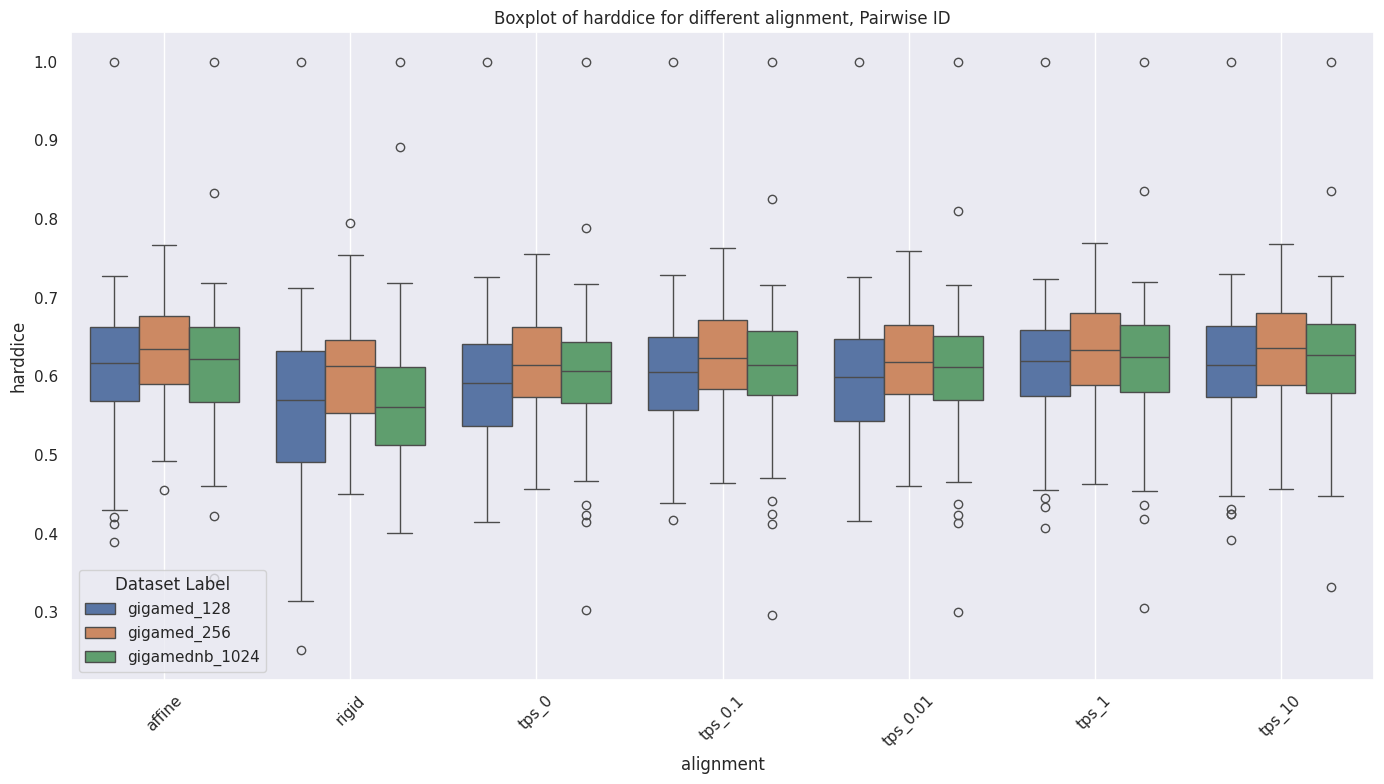

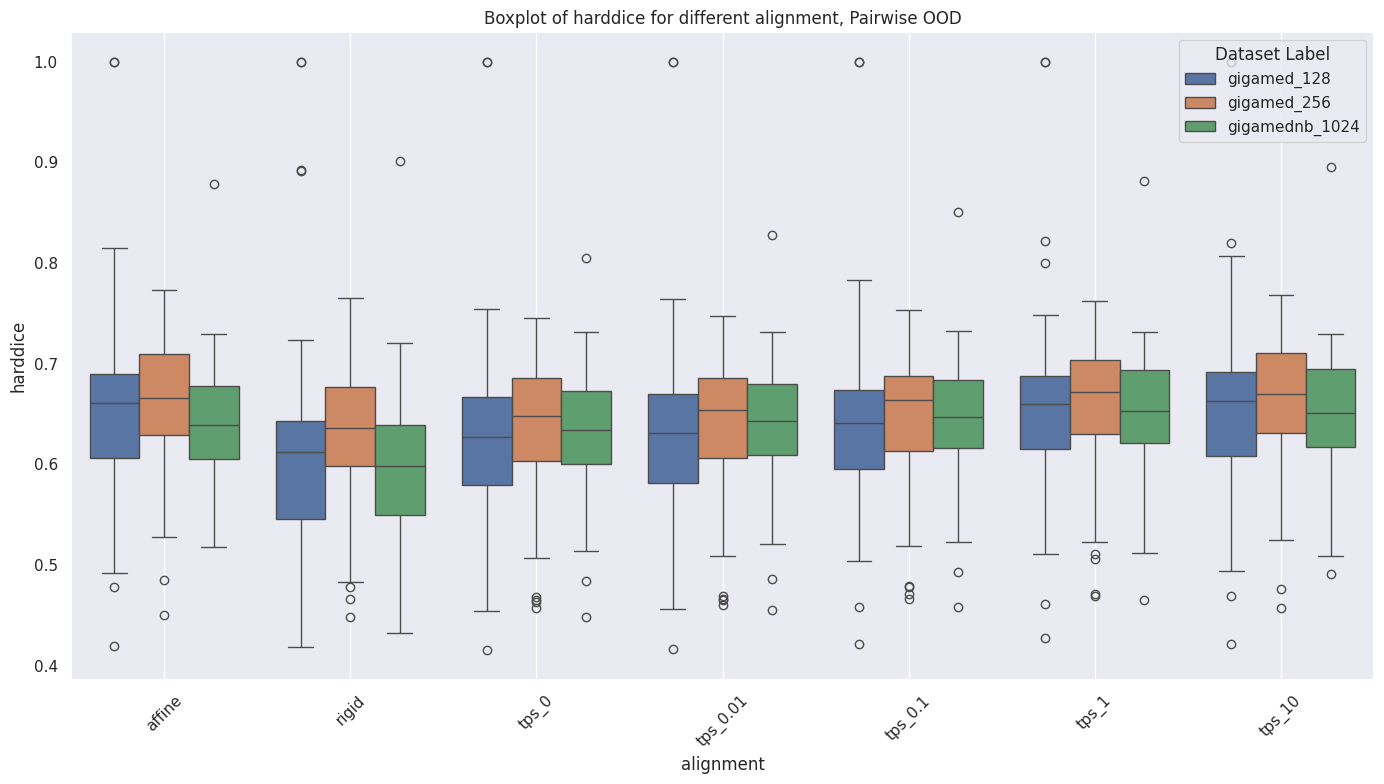

In [2]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_id.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_id.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_id.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_id.json'
gigamed_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_id.json'
gigamednb_1024 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
#               'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256,
              'gigamednb_1024': gigamednb_1024}, 
             title_suffix=', Pairwise ID')

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_ood.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_ood.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_ood.json'
gigamednb_1024 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_ood.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_ood.json'
gigamed_256 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
              # 'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256, 
              'gigamednb_1024': gigamednb_1024,},

             title_suffix=', Pairwise OOD')

# Group

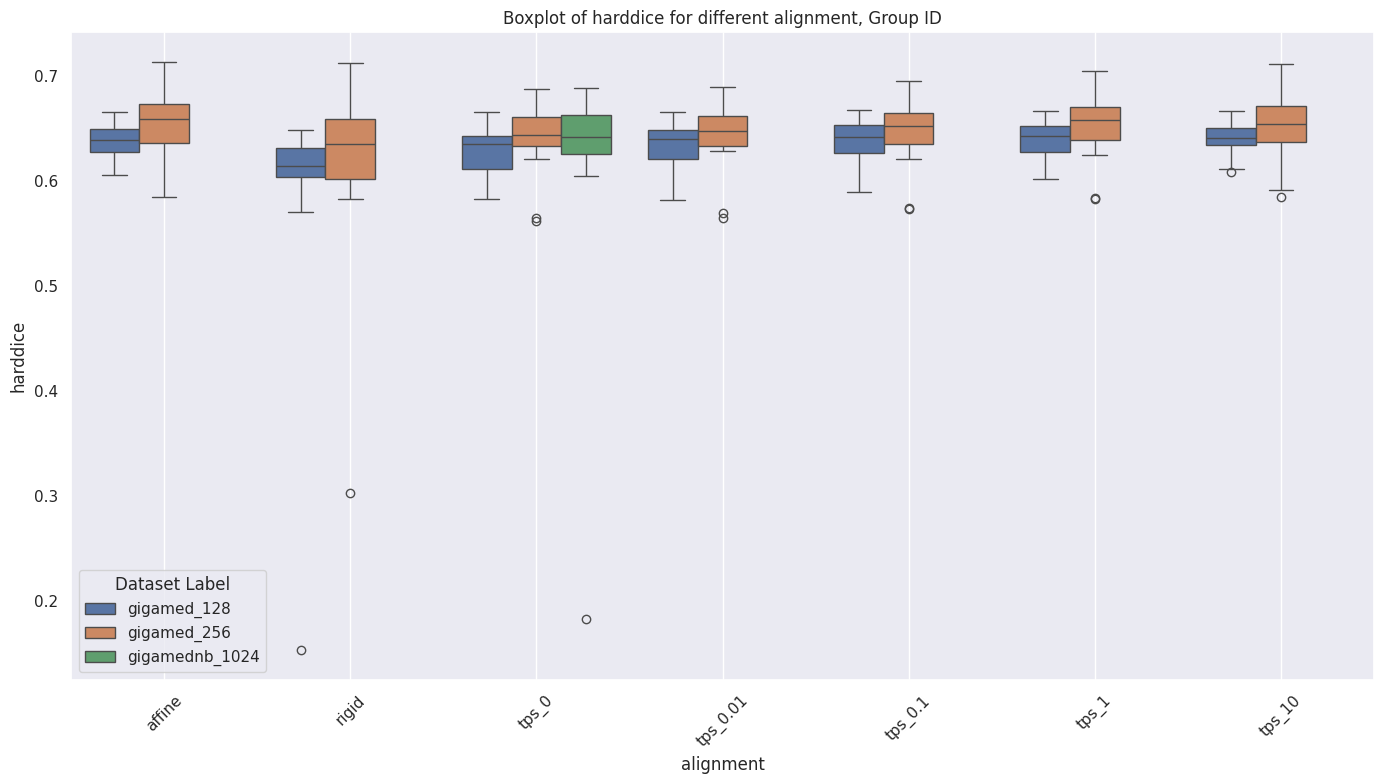

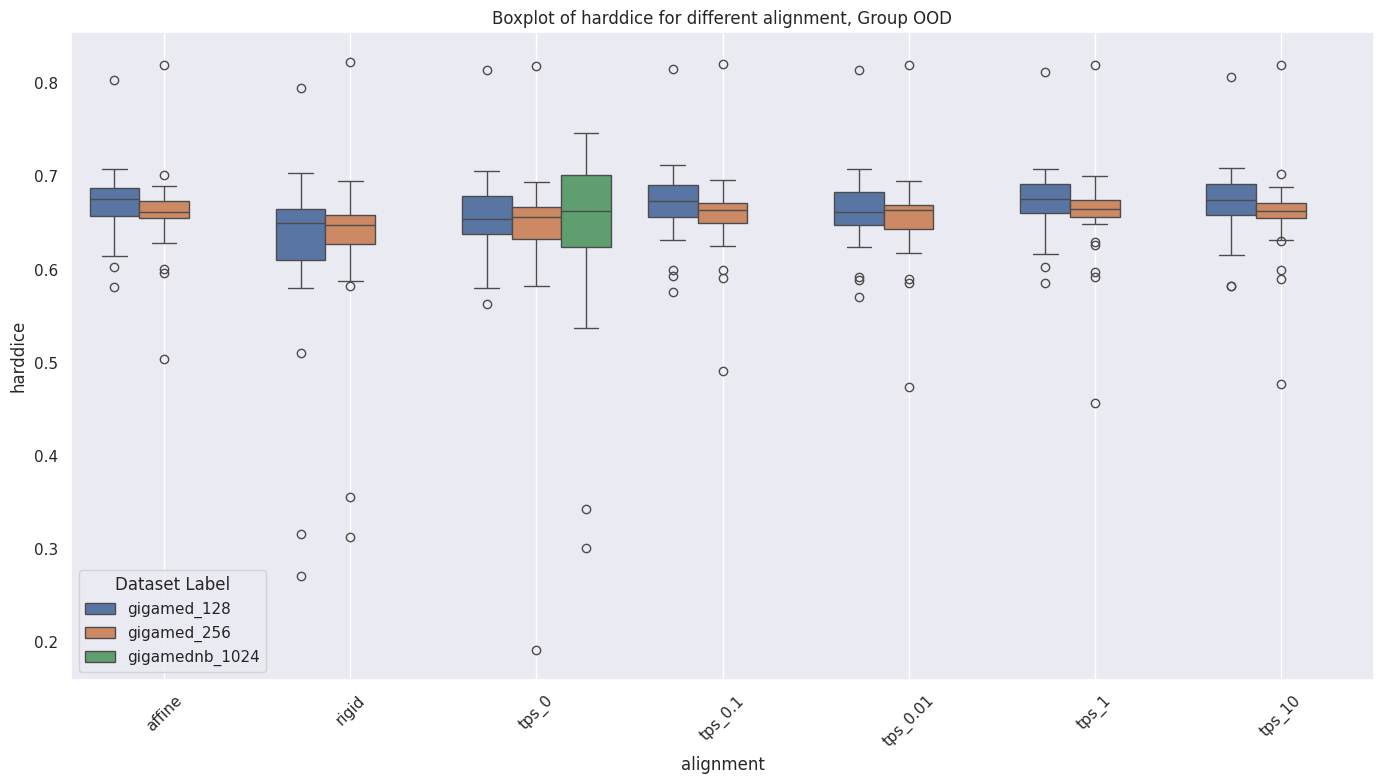

In [3]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_id.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_id.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_id.json'
gigamednb_1024 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_id.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_id.json'
gigamed_256 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
              'gigamednb_1024': gigamednb_1024,
#               'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256}, 
             title_suffix=', Group ID')

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_ood.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_ood.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_ood.json'
gigamednb_1024 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_ood.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_group_ood.json'
gigamed_256 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
              'gigamednb_1024': gigamednb_1024,
#               'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256}, 
             title_suffix=', Group OOD')

# Longitudinal

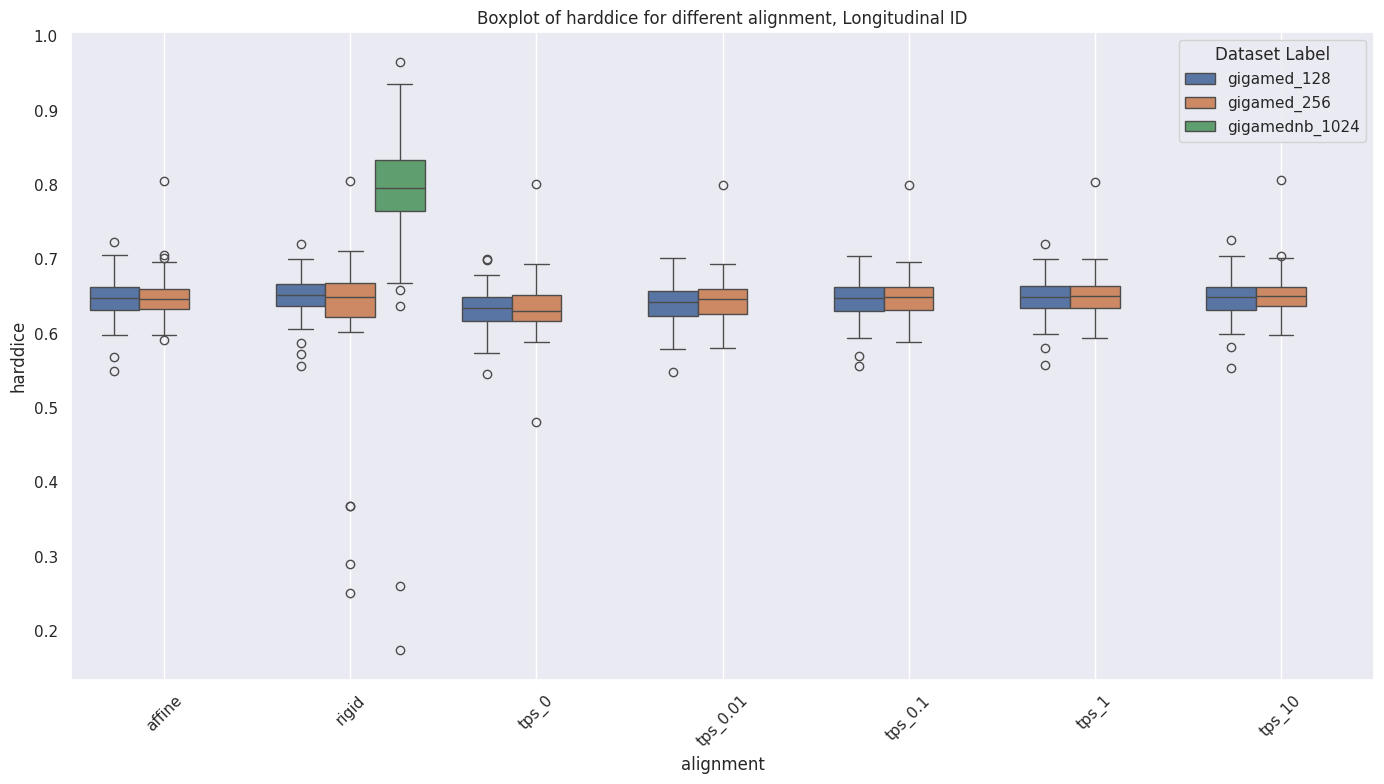

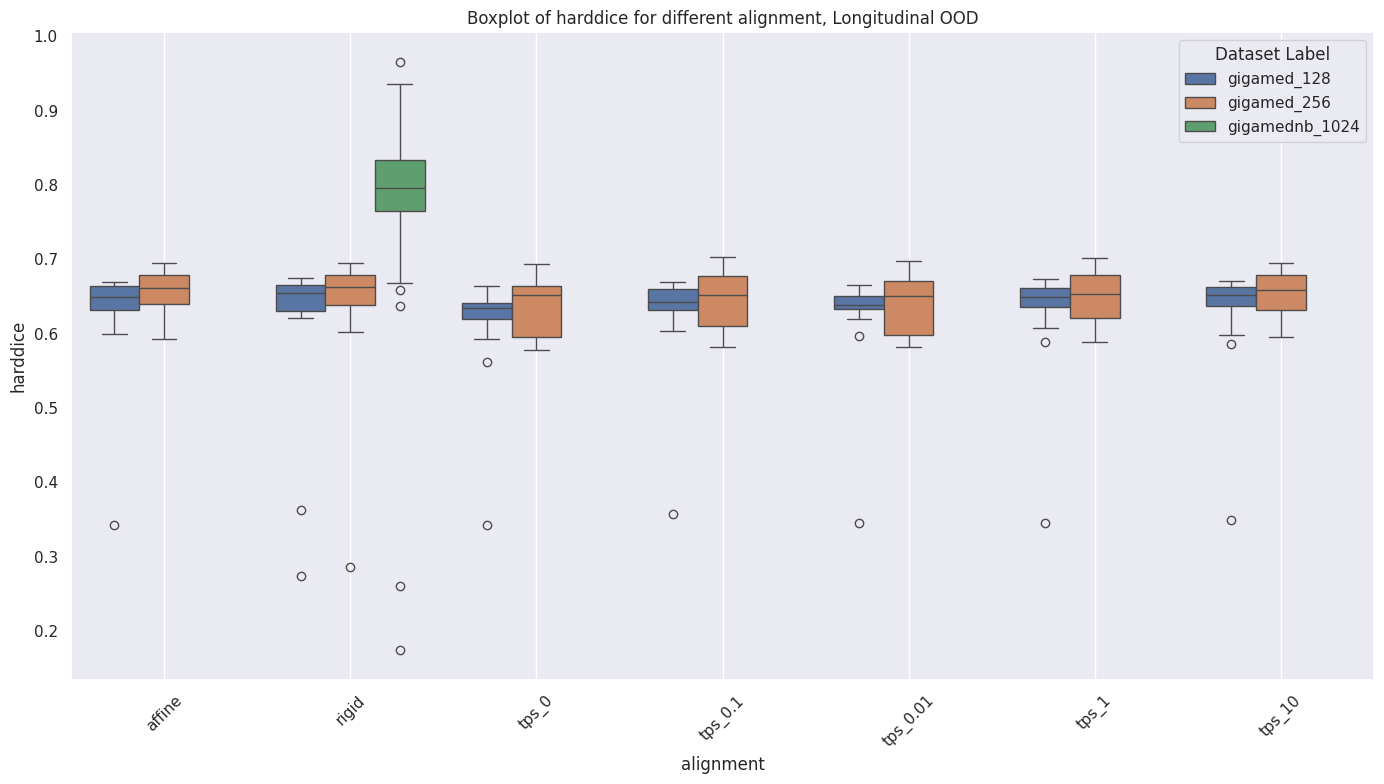

In [4]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_id.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_id.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_id.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_id.json'
gigamed_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_id.json'
gigamednb_1024 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
              'gigamednb_1024': gigamednb_1024,
#               'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256}, 
             title_suffix=', Longitudinal ID')

json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_ood.json'
gigamed_synthbrain_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_ood.json'
gigamed_128 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_ood.json'
gigamed_synthbrain_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_ood.json'
gigamed_256 = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamednb-keymorph_datasetgigamed_modelkeymorph_keypoints1024_batch1_normTypeinstance_lr3e-06/eval_results/summary_long_ood.json'
gigamed_1024 = load_data(json_path)

plot_boxplot('alignment', 'harddice', 
             {'gigamed_128':gigamed_128, 
#               'gigamed_synthbrain_128':gigamed_synthbrain_128, 
              'gigamednb_1024': gigamednb_1024,
#               'gigamed_synthbrain_256': gigamed_synthbrain_256,
              'gigamed_256': gigamed_256}, 
             title_suffix=', Longitudinal OOD')

# Lesion

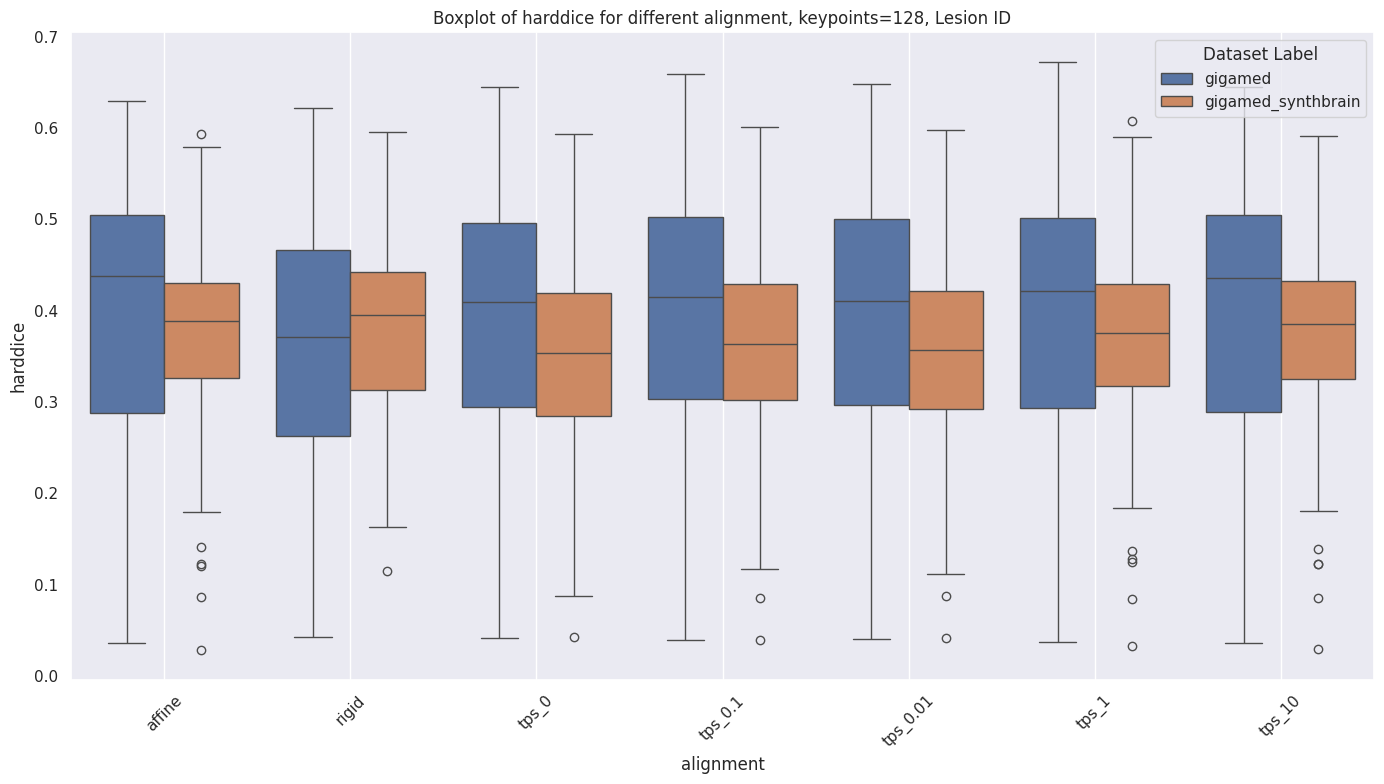

In [5]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_id.json'
gigamed_synthbrain = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_id.json'
gigamed = load_data(json_path)

plot_boxplot('alignment', 'harddice', {'gigamed':gigamed, 'gigamed_synthbrain':gigamed_synthbrain}, title_suffix=', keypoints=128, Lesion ID')

# json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_ood.json'
# gigamed_synthbrain = load_data(json_path)
# json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints128_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_ood.json'
# gigamed = load_data(json_path)

# plot_boxplot('alignment', 'harddice', {'gigamed':gigamed, 'gigamed_synthbrain':gigamed_synthbrain}, title_suffix=', keypoints=128, Lesion OOD')

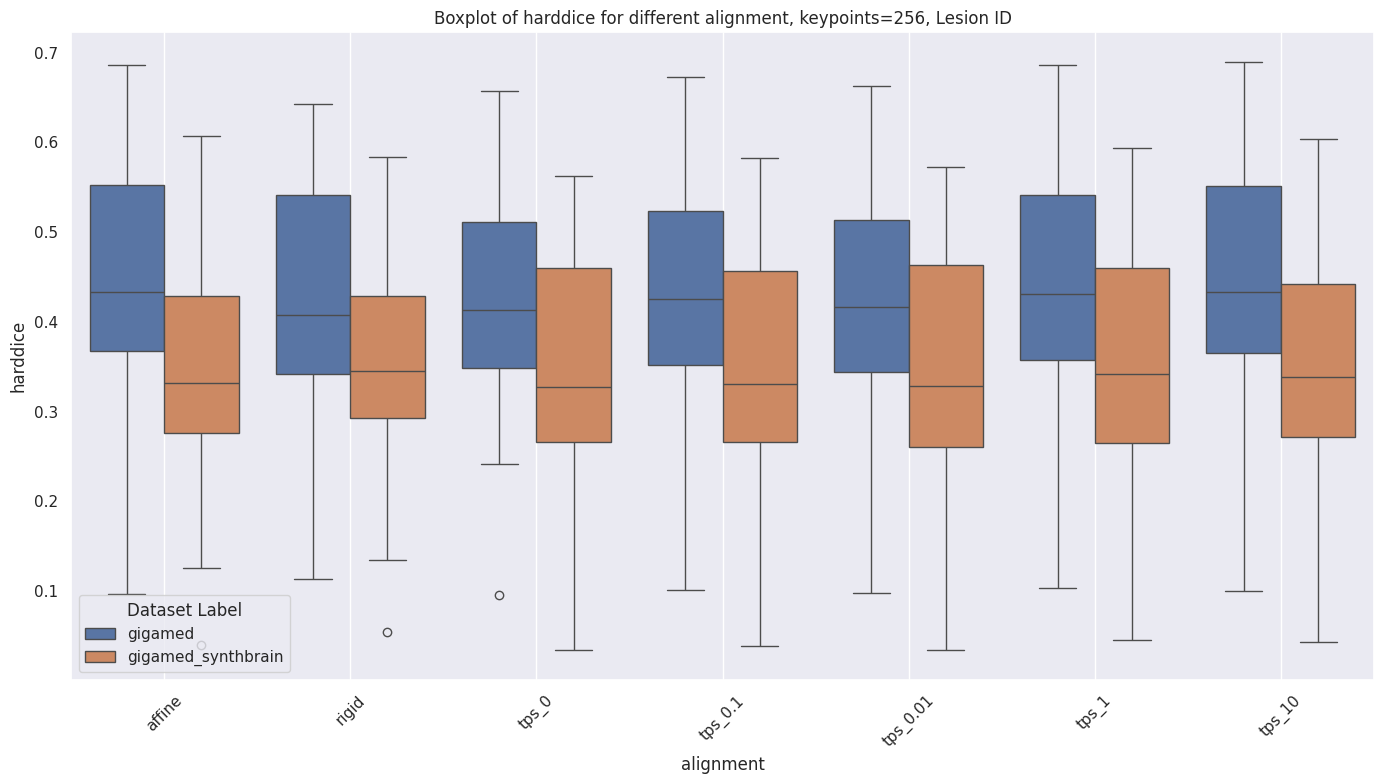

In [6]:
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_id.json'
gigamed_synthbrain = load_data(json_path)
json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_id.json'
gigamed = load_data(json_path)

plot_boxplot('alignment', 'harddice', {'gigamed':gigamed, 'gigamed_synthbrain':gigamed_synthbrain}, title_suffix=', keypoints=256, Lesion ID')

# json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-synthbrain-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_ood.json'
# gigamed_synthbrain = load_data(json_path)
# json_path = '/midtier/sablab/scratch/alw4013/keymorph/experiments/conv/__eval__gigamed-keymorph_datasetgigamed_keypoints256_batch1_normTypeinstance_lr3e-06/eval_results/summary_lesion_ood.json'
# gigamed = load_data(json_path)

# plot_boxplot('alignment', 'harddice', {'gigamed':gigamed, 'gigamed_synthbrain':gigamed_synthbrain}, title_suffix=', keypoints=256, Lesion OOD')